<a href="https://colab.research.google.com/github/pavlyk/DataScience/blob/master/C2W1_linreg_stochastic_grad_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Корректность проверена на Python 3.6:**
+ numpy 1.15.4
+ pandas 0.23.4

# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [0]:
from google.colab import drive # Используется для чтения файлов с google drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from pathlib import Path

PATH_TO_DATA = Path('drive/My Drive/_YandexDS/C2/')
adver_data = pd.read_csv(PATH_TO_DATA / 'advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [0]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [0]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [0]:
X = adver_data[['TV','Radio','Newspaper']].values
y = adver_data['Sales'].values

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [0]:
means, stds = X.mean(axis=0), X.std(axis=0)

In [0]:
X = (X - means)/stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [0]:
X[0:5]

array([[ 0.96985227,  0.98152247,  1.77894547],
       [-1.19737623,  1.08280781,  0.66957876],
       [-1.51615499,  1.52846331,  1.78354865],
       [ 0.05204968,  1.21785493,  1.28640506],
       [ 0.3941822 , -0.84161366,  1.28180188]])

In [0]:
import numpy as np
X = np.hstack((np.ones(200).reshape(200,1),X))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно 
неэффективной.**

In [0]:
def mserror(y, y_pred):
    mean = y.mean()
    
    return np.sqrt((y_pred - mean)**2/len(y_pred))

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'1 задание'.***

In [0]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [0]:
np.full((200),12.900000)

array([12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9,
       12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12.9, 12

In [0]:
t1 = np.dot(X.T,X)
t2 = np.dot(X.T,y)
print(X.shape, y.shape)
print(t1.shape, t2.shape)
print(t1)
print(t2)

# np.linalg.solve(X, y)

(200, 4) (200,)
(4, 4) (4,)
[[ 2.00000000e+02  2.20934382e-14 -8.82627305e-14  4.44089210e-14]
 [ 2.20934382e-14  2.00000000e+02  1.09617329e+01  1.13295750e+01]
 [-8.82627305e-14  1.09617329e+01  2.00000000e+02  7.08207502e+01]
 [ 4.44089210e-14  1.13295750e+01  7.08207502e+01  2.00000000e+02]]
[2804.5         814.20122413  599.77815915  237.63173437]


$$\large MSE =  \frac{\sum\limits_{i=1}^n(y_i-\widehat y_i)^2}{n} $$

In [0]:
mean = y.mean()

y_pred = np.full((200),12.900000)

# Z = (y - y_pred)**2
# Z.sum()/200

error = ((y - y_pred)**2).sum()  
error = error /(y.shape[0])
error

28.34575

In [0]:
answer1 = mserror(y, np.full((200),14.022500).reshape(200,1))
answer1
print(round(answer1, 3))

TypeError: ignored

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

Матрица ${(X^TX)}^{-1}X^T$

In [0]:
X

array([[ 1.00000000e+00,  9.69852266e-01,  9.81522472e-01,
         1.77894547e+00],
       [ 1.00000000e+00, -1.19737623e+00,  1.08280781e+00,
         6.69578760e-01],
       [ 1.00000000e+00, -1.51615499e+00,  1.52846331e+00,
         1.78354865e+00],
       [ 1.00000000e+00,  5.20496822e-02,  1.21785493e+00,
         1.28640506e+00],
       [ 1.00000000e+00,  3.94182198e-01, -8.41613655e-01,
         1.28180188e+00],
       [ 1.00000000e+00, -1.61540845e+00,  1.73103399e+00,
         2.04592999e+00],
       [ 1.00000000e+00, -1.04557682e+00,  6.43904671e-01,
        -3.24708413e-01],
       [ 1.00000000e+00, -3.13436589e-01, -2.47406325e-01,
        -8.72486994e-01],
       [ 1.00000000e+00, -1.61657614e+00, -1.42906863e+00,
        -1.36042422e+00],
       [ 1.00000000e+00,  6.16042873e-01, -1.39530685e+00,
        -4.30581584e-01],
       [ 1.00000000e+00, -9.45155670e-01, -1.17923146e+00,
        -2.92486143e-01],
       [ 1.00000000e+00,  7.90028350e-01,  4.96973404e-02,
      

In [0]:
B = np.linalg.pinv(X)

In [0]:
def normal_equation(X, y):
    return np.dot(np.linalg.pinv(X),y)

In [0]:
norm_eq_weights = normal_equation(X, y)
# print(X.shape, y.shape)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Полученный результат, округленный до 3 знаков после запятой, является ответом на *'2 задание'*.**

In [0]:
answer2 = norm_eq_weights[0] + norm_eq_weights[1]*0.96985227 + norm_eq_weights[2]*0.98152247 + norm_eq_weights[3]*1.77894547
print(round(answer2, 3))

31.55


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [0]:
def linear_prediction(X, w):
  w0 = w[0]
  w1 = w[1]
  w2 = w[2]
  w3 = w[3]
  
  X2 = []
  for i in X:
    X2.append(w0 + w1*i[0] + w2*i[1] + w3*i[2])
    
  return X2

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?
Полученный результат, округленный до 3 знаков после запятой, является ответом на *'3 задание'***

In [0]:
b = np.ones(200).reshape(200,1)

Z = np.c_[b,X]

In [0]:
linear_prediction(X, norm_eq_weights)

[31.55028269702976,
 9.94086728283056,
 24.661415288004342,
 22.07574585925607,
 23.01287075547397,
 28.058970041415872,
 -3.5677988596464107,
 -9.184753651089265,
 -19.638667726407657,
 -0.36709797852830217,
 -2.79448898781465,
 -11.0161630134779,
 22.698392904730376,
 -12.746686325365173,
 15.734911337911804,
 19.882564635272114,
 55.17826456522507,
 24.57060858430738,
 -6.524131269746922,
 -3.4666596877803366,
 20.985602157252607,
 2.339560669872297,
 11.860683817403938,
 3.7677179542948793,
 -6.737066129566413,
 0.5914369306306106,
 -7.81395639608135,
 2.022645068573963,
 2.290459845743376,
 8.05168570731388,
 16.82967358934256,
 8.0085855584189,
 1.969785625181721,
 -11.738884484945018,
 -12.666839039232,
 -5.603416778010995,
 -8.6989608535572,
 11.297382653762336,
 3.4595883976328294,
 7.470072343258328,
 6.40395129805829,
 10.138608537602394,
 -9.869509254908401,
 3.212055109278344,
 8.167209000709356,
 5.445788252938566,
 5.3917247632457235,
 -0.8617351123201358,
 19.0314314043

In [0]:
X[0][0]

0.9698522664314473

In [0]:
norm_eq_weights[0] + norm_eq_weights[1]*X[0][0] + norm_eq_weights[2]*X[0][1] + norm_eq_weights[3]*X[0][2]

31.55028269702976

In [0]:
Z.shape

(200, 4)

In [0]:
norm_eq_weights.shape

(4,)

In [0]:
np.dot(Z,norm_eq_weights)

array([ 3.15502827e+01,  9.94086728e+00,  2.46614153e+01,  2.20757459e+01,
        2.30128708e+01,  2.80589700e+01, -3.56779886e+00, -9.18475365e+00,
       -1.96386677e+01, -3.67097979e-01, -2.79448899e+00, -1.10161630e+01,
        2.26983929e+01, -1.27466863e+01,  1.57349113e+01,  1.98825646e+01,
        5.51782646e+01,  2.45706086e+01, -6.52413127e+00, -3.46665969e+00,
        2.09856022e+01,  2.33956067e+00,  1.18606838e+01,  3.76771795e+00,
       -6.73706613e+00,  5.91436931e-01, -7.81395640e+00,  2.02264507e+00,
        2.29045985e+00,  8.05168571e+00,  1.68296736e+01,  8.00858556e+00,
        1.96978563e+00, -1.17388845e+01, -1.26668390e+01, -5.60341678e+00,
       -8.69896085e+00,  1.12973827e+01,  3.45958840e+00,  7.47007234e+00,
        6.40395130e+00,  1.01386085e+01, -9.86950925e+00,  3.21205511e+00,
        8.16720900e+00,  5.44578825e+00,  5.39172476e+00, -8.61735112e-01,
        1.90314314e+01,  5.35567587e+00,  8.28158790e+00, -1.49789146e+01,
        1.19914513e+01,  

In [0]:
y.shape

(200,)

In [0]:
np.dot(Z,norm_eq_weights).shape

(200,)

In [0]:
# a = np.dot(X.T, X) # преобразуем левую часть
# b = np.dot(X.T, y) # преобразуем правую часть
# res = np.linalg.solve(a, b) # решаем систему
# res

In [0]:
error = ((y - np.dot(X,norm_eq_weights))**2).sum()  
error = error /(y.shape[0])
error

2.784126314510936

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, np.dot(Z,norm_eq_weights))

281.87321747751315

In [0]:
answer3 = error
print(round(answer3, 3))

281.873


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

### Градиент функции потерь
$$\Large \Delta Q(\overrightarrow w) = \frac{2}{N} \sum_{i=0}^{N} (\tilde y_i - y_i) * \overrightarrow x$$

$$\Large w_j = w_j - \frac{2\eta}{N} \sum_{i=0}^{N}(\tilde y_i - y_i)*x_{j}$$

#### Но, когда у нас очень большая матрица с данными (N велико), то на каждом шаге пересчитывать все значения не очень эффективно, поэтому используют так называемую стохастическую реализацию градиентного спуска в котором мы суммирование по всем данным заменяем на случайный объект из нашей матрицы признаков

### Выражение для обновления весов

$$\Large w_j = w_j - \frac{2\eta}{N}(\tilde y_k - y_k)*x_{jk}$$

In [0]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    N = len(y)
    x = X[train_ind] # Рандомную строку матрицы X
    yk = y[train_ind]
    y_pred = np.dot(x, w) # Делаем предсказание
    grad0 = 2/N*(y_pred - yk)*x[0]
    grad1 = 2/N*(y_pred - yk)*x[1]
    grad2 = 2/N*(y_pred - yk)*x[2]
    grad3 = 2/N*(y_pred - yk)*x[3]
    return  w - eta * np.array([grad0, grad1, grad2, grad3]) # Выражение для обновления весов

[  5.63213512   5.00364372 199.97932335]
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['step', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


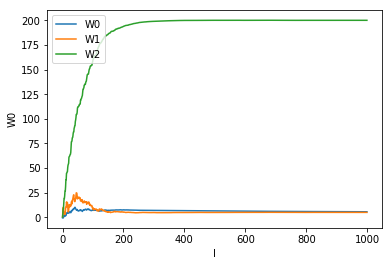

In [0]:
# Мой пример для тренировки
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
# w0 + w1*x1 + w2*x2

# Предположим истинный ответ
def f(x, y):
  return 5 + 5*x + 200*y

def fw(w0, w1, w2, x, y):
#   print(w0, w1, w2, x, y)
  return w0 + w1*x + w2*y

X = []
Y = []
Z = []
for x in range(-5,6):
  for y in range(-5,6):
    X.append(x)
    Y.append(y)
    Z.append(f(x, y))
    
def step(w, say, eta=0.1):
    N = len(Z)
    t = np.random.randint(N)
    y_pred = fw(w[0], w[1], w[2], X[t], Y[t])
        
    grad0 = 2/N*(y_pred - Z[t])*1
    grad1 = 2/N*(y_pred - Z[t])*X[t]
    grad2 = 2/N*(y_pred - Z[t])*Y[t]
    new_w = w - eta * np.array([grad0, grad1, grad2])
    
#     print('-------------------')
#     print('w', w)
#     print('x, y', X[t], Y[t])
#     print('z', Z[t])
#     print('y_pred', y_pred)
#     print('grad',2/N*(y_pred - Z[t]))
#     print(grad0, grad1, grad2)
#     print(new_w)
    
    return new_w # Выражение для обновления весов

W0 = []
W1 = []
W2 = []
  
w = step([0,0,0], False)
W0.append(w[0])
W1.append(w[1])
W2.append(w[2])
I = [0]

for i in range(1,1000):
  I.append(i)
  if i > 1190:  
    w = step(w, True)
  else:
    w = step(w, False)  
  W0.append(w[0])
  W1.append(w[1])
  W2.append(w[2])
  
print(w)

%pylab inline
xlabel('I')
ylabel('W0')
plot(I,W0,label='W0')
plot(I,W1,label='W1')
plot(I,W2,label='W2')
legend(loc='upper left')


In [0]:
# Мой пример для тренировки функции модуля
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Предположим истинный ответ
def f(x):
  return 200 + 5*x

def fw(w0, w1, x):
#   print(w0, w1, w2, x, y)
  return w1*x 

X = []
Y = []
for x in range(-5,6):
  for y in range(-5,6):
    X.append(x)
    Y.append(f(x))
    
def step(w, eta=0.1):
    N = len(Z)
    t = np.random.randint(N)
    y_pred = fw(w[0], w[1], X[t])
        
    grad0 = 1/N*(y_pred - Y[t])*1
    grad1 = 1/N*(y_pred - Y[t])*X[t]
    new_w = w - eta * np.array([grad0, grad1, grad2])
    
#     print('-------------------')
#     print('w', w)
#     print('x, y', X[t], Y[t])
#     print('z', Z[t])
#     print('y_pred', y_pred)
#     print('grad',2/N*(y_pred - Z[t]))
#     print(grad0, grad1, grad2)
#     print(new_w)
    
    return new_w # Выражение для обновления весов

W0 = []
W1 = []
W2 = []
  
w = step([0,0,0], False)
W0.append(w[0])
W1.append(w[1])
W2.append(w[2])
I = [0]

for i in range(1,1000):
  I.append(i)
  if i > 1190:  
    w = step(w, True)
  else:
    w = step(w, False)  
  W0.append(w[0])
  W1.append(w[1])
  W2.append(w[2])
  
print(w)

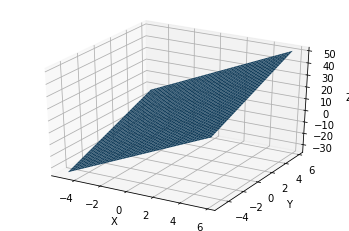

In [0]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 6, 0.25)
Y = np.arange(-5, 6, 0.25)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [0]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                max_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > max_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        new_w = stochastic_gradient_step(X, y, w, random_ind, eta)
        errors.append(((y - np.dot(X,w))**2).sum()/(y.shape[0]))
                      
        weight_dist = np.linalg.norm(w-new_w)
        w = new_w
        iter_num += 1
        
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [0]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, [0,0,0,0],max_iter= 10**5)

CPU times: user 2.13 s, sys: 0 ns, total: 2.13 s
Wall time: 2.14 s


**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

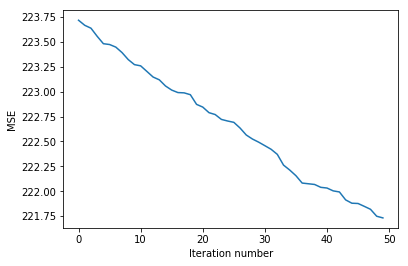

In [0]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

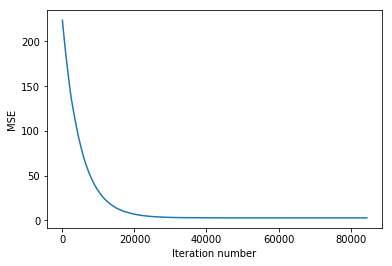

In [0]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [0]:
stoch_grad_desc_weights

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [0]:
stoch_errors_by_iter[-1]

2.784412588352759

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Полученный результат, округленный до 3 знаков после запятой, является ответом на *'4 задание'*.**

In [0]:
answer4 = ((y - np.dot(X,stoch_grad_desc_weights))**2).sum()/(y.shape[0])
print(round(answer4, 3))

2.784
